<a href="https://colab.research.google.com/github/jasim-1863/SDCProjects/blob/main/artificialNeuralNetwork.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 2s 16ms/step - accuracy: 0.4856 - loss: 0.7912 - val_accuracy: 0.6438 - val_loss: 0.6557
Epoch 2/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.5880 - loss: 0.6534 - val_accuracy: 0.7563 - val_loss: 0.6159
Epoch 3/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.7173 - loss: 0.5911 - val_accuracy: 0.7812 - val_loss: 0.5613
Epoch 4/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.7408 - loss: 0.5669 - val_accuracy: 0.7937 - val_loss: 0.5017
Epoch 5/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.7986 - loss: 0.5086 - val_accuracy: 0.8062 - val_loss: 0.4405
Epoch 6/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.8095 - loss: 0.4373 - val_accuracy: 0.8188 - val_loss: 0.3897
Epoch 7/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.8437 - loss: 0.3899 - val_accuracy: 0.8438 - val_loss: 0.3538
Epoch 8/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.8798 - loss: 0.3237 - val_accuracy: 0.8625 - 

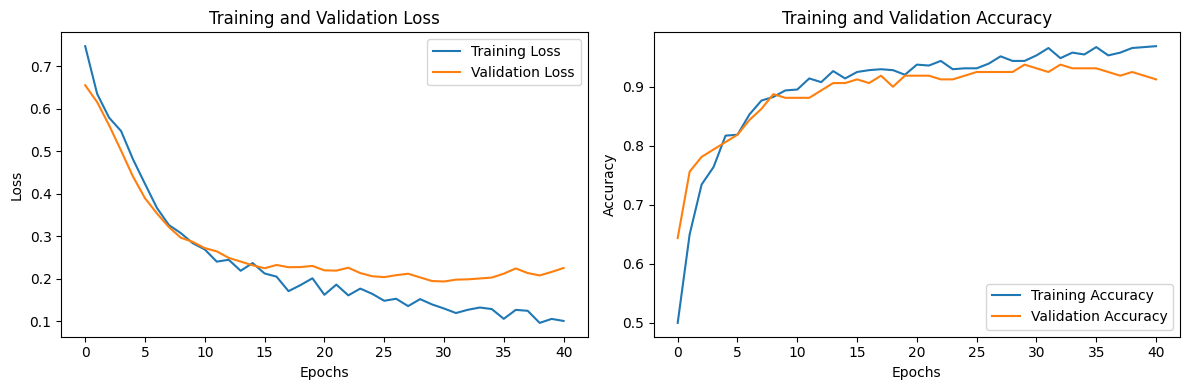

Epoch 0, Loss: 0.6932
Epoch 100, Loss: 0.6931
Epoch 200, Loss: 0.6930
Epoch 300, Loss: 0.6929
Epoch 400, Loss: 0.6928


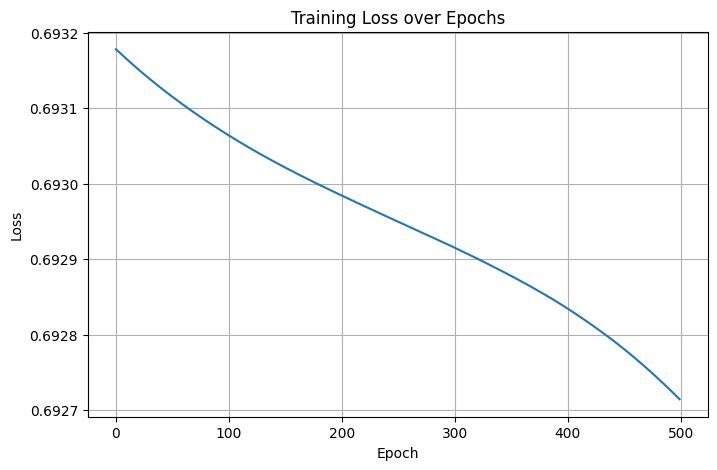


Simple Neural Network Sample Predictions: [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0]
Actual Values: [0 0 1 1 0 0 0 1 0 0 1 1 0 1 0 1 1 0 1 0 1 0 1 0 0 1 1 0 0 1 0 0 1 1 1 1 1
 1 0 0 0 0 1 0 0 1 1 0 0 0]
Sample Accuracy: 0.5400


In [18]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.datasets import make_classification
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# Set random seeds for reproducibility
np.random.seed(42)
tf.random.set_seed(42)

# Generate sample data
X, y = make_classification(n_samples=1000, n_features=20, n_informative=10,
                          n_redundant=5, n_classes=2, random_state=42)

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Scale the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Build the ANN model
model = Sequential([
    Dense(64, activation='relu', input_shape=(X_train.shape[1],)),
    Dropout(0.3),
    Dense(32, activation='relu'),
    Dropout(0.2),
    Dense(16, activation='relu'),
    Dense(1, activation='sigmoid')
])

# Compile the model
model.compile(optimizer=Adam(learning_rate=0.001),
              loss='binary_crossentropy',
              metrics=['accuracy'])

# Define early stopping
early_stopping = EarlyStopping(
    monitor='val_loss',
    patience=10,
    restore_best_weights=True
)

# Train the model
history = model.fit(
    X_train_scaled, y_train,
    epochs=100,
    batch_size=32,
    validation_split=0.2,
    callbacks=[early_stopping],
    verbose=1
)

# Evaluate the model
y_pred_prob = model.predict(X_test_scaled)
y_pred = (y_pred_prob > 0.5).astype(int).flatten()

accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)

print(f"ANN Accuracy: {accuracy:.4f}")
print("Confusion Matrix:")
print(conf_matrix)
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

# Plot training history
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.tight_layout()
plt.show()

# Manual implementation of a simple neural network
class SimpleNeuralNetwork:
    def __init__(self, input_size, hidden_size, output_size):
        # Initialize weights and biases
        self.W1 = np.random.randn(input_size, hidden_size) * 0.01
        self.b1 = np.zeros((1, hidden_size))
        self.W2 = np.random.randn(hidden_size, output_size) * 0.01
        self.b2 = np.zeros((1, output_size))

    def sigmoid(self, z):
        return 1 / (1 + np.exp(-np.clip(z, -500, 500)))  # Clip to avoid overflow

    def relu(self, z):
        return np.maximum(0, z)

    def sigmoid_derivative(self, z):
        s = self.sigmoid(z)
        return s * (1 - s)

    def relu_derivative(self, z):
        return np.where(z > 0, 1, 0)

    def forward(self, X):
        # Forward propagation
        self.z1 = np.dot(X, self.W1) + self.b1
        self.a1 = self.relu(self.z1)
        self.z2 = np.dot(self.a1, self.W2) + self.b2
        self.a2 = self.sigmoid(self.z2)
        return self.a2

    def compute_loss(self, y_true, y_pred):
        # Binary cross-entropy loss
        m = y_true.shape[0]
        loss = -1/m * np.sum(y_true * np.log(y_pred + 1e-15) + (1 - y_true) * np.log(1 - y_pred + 1e-15))
        return loss

    def backward(self, X, y, learning_rate=0.01):
        # Backward propagation
        m = X.shape[0]

        # Output layer gradient
        dz2 = self.a2 - y
        dW2 = 1/m * np.dot(self.a1.T, dz2)
        db2 = 1/m * np.sum(dz2, axis=0, keepdims=True)

        # Hidden layer gradient
        dz1 = np.dot(dz2, self.W2.T) * self.relu_derivative(self.z1)
        dW1 = 1/m * np.dot(X.T, dz1)
        db1 = 1/m * np.sum(dz1, axis=0, keepdims=True)

        # Update parameters
        self.W2 -= learning_rate * dW2
        self.b2 -= learning_rate * db2
        self.W1 -= learning_rate * dW1
        self.b1 -= learning_rate * db1

    def fit(self, X, y, epochs=1000, learning_rate=0.01, verbose=True):
        # Reshape y if needed
        if len(y.shape) == 1:
            y = y.reshape(-1, 1)

        losses = []

        for epoch in range(epochs):
            # Forward pass
            y_pred = self.forward(X)

            # Compute loss
            loss = self.compute_loss(y, y_pred)
            losses.append(loss)

            # Backward pass
            self.backward(X, y, learning_rate)

            # Print progress
            if verbose and epoch % 100 == 0:
                print(f"Epoch {epoch}, Loss: {loss:.4f}")

        return losses

    def predict(self, X, threshold=0.5):
        y_pred = self.forward(X)
        return (y_pred >= threshold).astype(int)

# Test the manual neural network on a smaller dataset
# Use a smaller subset for faster training
X_sample = X_train_scaled[:200]
y_sample = y_train[:200].reshape(-1, 1)

simple_nn = SimpleNeuralNetwork(input_size=X_sample.shape[1], hidden_size=4, output_size=1)
losses = simple_nn.fit(X_sample, y_sample, epochs=500, learning_rate=0.01, verbose=True)

# Plot the loss
plt.figure(figsize=(8, 5))
plt.plot(losses)
plt.title('Training Loss over Epochs')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.grid(True)
plt.show()

# Make predictions on test data
y_sample_pred = simple_nn.predict(X_test_scaled[:50])
print("\nSimple Neural Network Sample Predictions:", y_sample_pred.flatten())
print("Actual Values:", y_test[:50])
print(f"Sample Accuracy: {accuracy_score(y_test[:50], y_sample_pred.flatten()):.4f}")